###How does consumer behavior affect on Black Friday?

A store is about to launch Black Friday, so it will have many promotions. The company wants to know which products it should invest in to create promotions that generate money and attract new customers to the store. The given dataset is from last year, and it contains data from the Black Friday sales in the infant area, specifically the baby section (diapers, powdered milk, baby food).

We load libraries and get familiar with the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Yael/DEV/0. Projects-Data/3. Black Friday/Black_friday_sale.csv", header = 0)

In [3]:
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


Data cleanning for data type and format

In [4]:
df["Product_Category_1"].replace(np.nan, 0, inplace=True)
df["Product_Category_2"].replace(np.nan, 0, inplace=True)
df["Product_Category_3"].replace(np.nan, 0, inplace=True)

In [5]:
df["Stay_In_Current_City_Years"].replace('4+', '4', inplace=True)

In [6]:
df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [7]:
df["Age"].replace(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'], ['50', '35', '45' , '25' , '55', '60' , '17'] , inplace=True)

In [8]:
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,45,1,B,4,1,5,14.0,0.0
3,1000010,P00145342,F,45,1,B,4,1,4,9.0,0.0
4,1000011,P00053842,F,35,1,C,1,0,4,5.0,12.0


In [9]:
df["Age"] = df["Age"].astype(int)
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)
df["Product_Category_1"] = df["Product_Category_1"].astype(float)

In [10]:
df.drop_duplicates()
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,50,7,B,2,1,1.0,11.0,0.0
1,1000009,P00113442,M,35,17,C,0,0,3.0,5.0,0.0


<ipython-input-17-0a112029f649>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method="pearson")


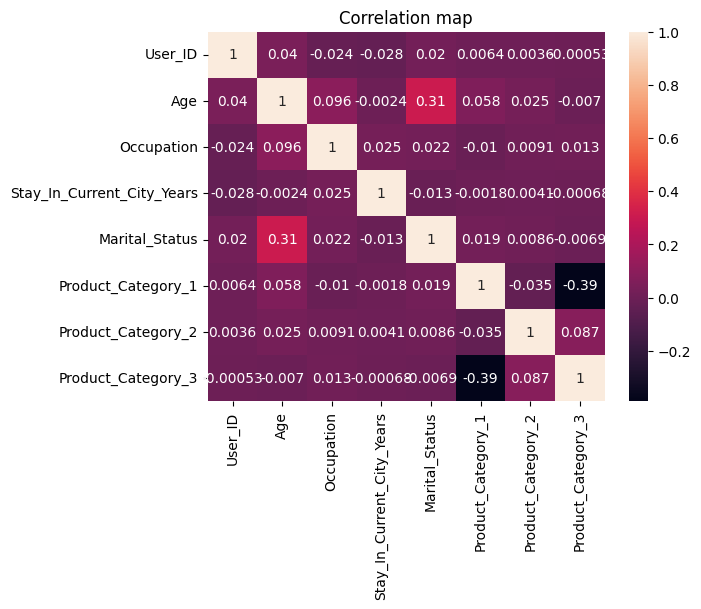

In [17]:
correlation = df.corr(method="pearson")
sns.heatmap(correlation,annot=True)
plt.title('Correlation map')
#plt.xlabel('')
#plt.ylabel('')
plt.show()

We use a method to get some visual to know the characteristics of the sample population (Age of the population by Gender)

<ipython-input-12-c065bc728f8b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Age', hue='Gender', shade=True);


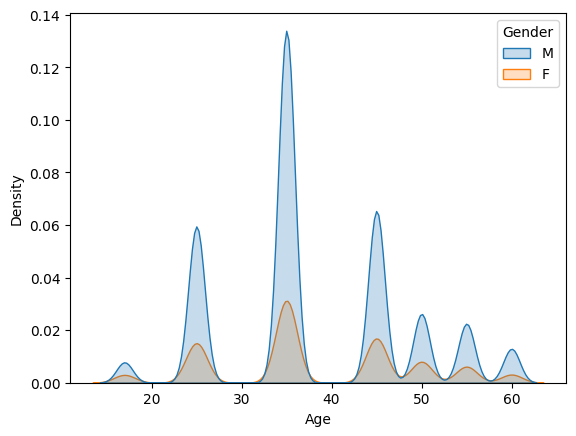

In [12]:
sns.kdeplot(data=df, x='Age', hue='Gender', shade=True);

We use a method to get some visual to know the characteristics of the sample population (Occupation of the population by Gender)

<ipython-input-13-c35392608646>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Occupation', hue='Gender', shade=True);


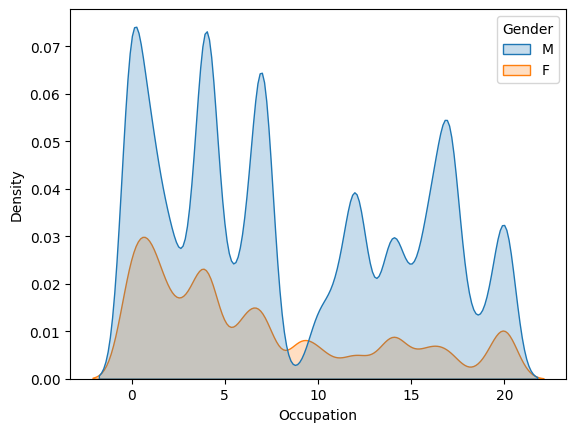

In [13]:
sns.kdeplot(data=df, x='Occupation', hue='Gender', shade=True);

We use a method to get some visual to know the characteristics of the sample population (Years living in the current city of the population by Gender)

<ipython-input-14-07b594146568>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Stay_In_Current_City_Years', hue='Gender', shade=True);


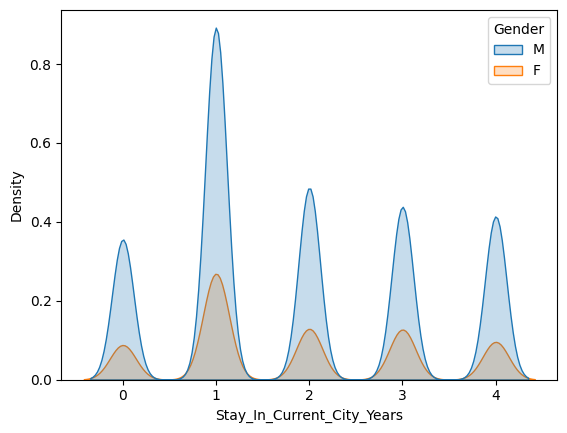

In [14]:
sns.kdeplot(data=df, x='Stay_In_Current_City_Years', hue='Gender', shade=True);

We use a method to get some visual to know the characteristics of the sample population (Married status of the population by Gender)

<ipython-input-15-76d13bab9f69>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='Marital_Status', hue='Gender', shade=True);


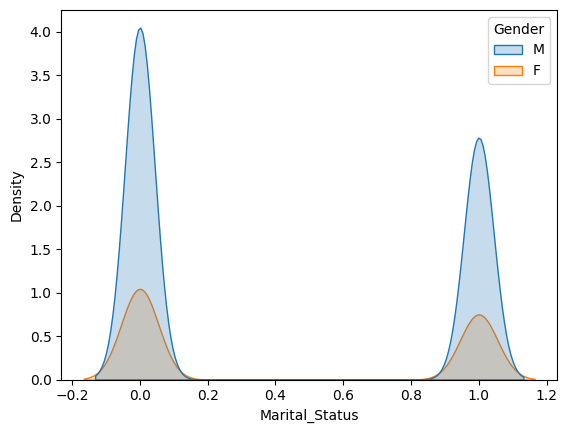

In [15]:
sns.kdeplot(data=df, x='Marital_Status', hue='Gender', shade=True);

As we can see, our sample is predominantly composed of more men than women. This is important for the analysis because initially, it may not make sense. However, most mothers in the early stages of their baby's growth (first few months after birth) do not go out and solely take care of the baby. Therefore, the people who end up making these purchases are the fathers.

Given the above, the most appropriate way to boost sales would be to have a promotion on a male-oriented item, such as a beer promotion, as the majority of these purchases are made by fathers. On the other hand, women could receive some kind of coupon or delivery service.